In [50]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as colors

In [5]:
# Set your username and token here!
username = 'jlau'
token = '74eb5fb45fa2f614'

# Set the datastream and start/enddates
datastream_sebs = 'bnfsebsS20.b1'
startdate = '2025-04-01'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_sebs = act.discovery.download_arm_data(username, token, datastream_sebs, startdate, enddate)

datastream_ecor = 'bnfecorsfS20.b1'
result_ecor = act.discovery.download_arm_data(username, token, datastream_ecor, startdate, enddate)

datastream_sirs = 'bnfsirsS20.b1'
result_sirs = act.discovery.download_arm_data(username, token, datastream_sirs, startdate, enddate)

[DOWNLOADING] bnfsebsS20.b1.20250401.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250430.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250424.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250427.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250417.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250422.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250404.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250411.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250429.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250418.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250425.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250410.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250405.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250421.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250402.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250403.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250414.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250423.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250428.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250412.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250420.000

In [6]:
# Let's read in the data using ACT and check out the data
ds_sebs = act.io.read_arm_netcdf(result_sebs)
ds_sebs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


<xarray.Dataset> Size: 444kB
Dimensions:                        (time: 1440, bound: 2)
Coordinates:
  * time                           (time) datetime64[ns] 12kB 2025-04-01 ... ...
Dimensions without coordinates: bound
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 12kB 2025-04-01 ... ...
    time_offset                    (time) datetime64[ns] 12kB 2025-04-01 ... ...
    time_bounds                    (time, bound) object 23kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    down_short_hemisp              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    up_short_hemisp                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                            (time) float32 6kB 34.65 34.65 ... 34.65
    lon                            (time) float32 6kB -87.29 -87.29 ... -87.29
    alt                            (time) float32 6kB 178.0 178.0 ... 178.0
Attributes: (12/33)
    command_line:            sebs_ingest -s bnf -f S20 --max-runtime 0
    Conventions:             ARM-1.3
    process_version:         ingest-sebs-1.9-0.el9
    dod_version:             sebs-b1-1.6
    input_source:            /data/collection/bnf/bnfsebsS20.00/SEBS_Table30....
    site_id:                 bnf
    ...                      ...
    qc_bit_3_assessment:     Bad
    history:                 created by user armflowprod on machine prod-slur...
    _file_dates:             ['20250401', '20250402', '20250403', '20250404',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             bnfsebsS20.b1
    _arm_standards_flag:     1

In [7]:
#ECOR has sensible and latent heat flux together
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_ecor

<xarray.Dataset> Size: 983kB
Dimensions:                                 (time: 1437, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 11kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 11kB 2025-0...
    time_offset                             (time) datetime64[ns] 11kB 2025-0...
    time_bounds                             (time, bound) object 23kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 11kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 11kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 6kB 34.65 ... 34.65
    lon                                     (time) float32 6kB -87.29 ... -87.29
    alt                                     (time) float32 6kB 178.0 ... 178.0
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S20 --max-runtime 0
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.4-0.el9
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS20.00/2025-03-31T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user armflowprod on machine prod-slurmn...
    _file_dates:           ['20250401', '20250402', '20250403', '20250404', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS20.b1
    _arm_standards_flag:   1

In [8]:
# Let's read in the data using ACT and check out the data
ds_sirs = act.io.read_arm_netcdf(result_sirs)
ds_sirs

<xarray.Dataset> Size: 17MB
Dimensions:                                       (time: 43200, bound: 2)
Coordinates:
  * time                                          (time) datetime64[ns] 346kB ...
Dimensions without coordinates: bound
Data variables: (12/93)
    base_time                                     (time) datetime64[ns] 346kB ...
    time_offset                                   (time) datetime64[ns] 346kB ...
    time_bounds                                   (time, bound) object 691kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    up_long_hemisp                                (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_up_long_hemisp                             (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1                             (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                                            ...
    qc_down_short_hemisp_vent_tachometer          (time) int32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1_netir                       (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp2_netir                       (time) float32 173kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                                           (time) float32 173kB 34.65 ...
    lon                                           (time) float32 173kB -87.29...
    alt                                           (time) float32 173kB 178.0 ...
Attributes: (12/23)
    command_line:          mergerad2sirs -s bnf -f S20 --max-runtime 0
    Conventions:           ARM-1.3
    process_version:       ingest-mergerad2sirs-1.0-0.el9
    dod_version:           sirs-b1-8.0
    input_datastreams:     bnfgndrad1sS20.a0 : 1.2 : 20250331.000000-20250401...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1475460
    history:               created by user armflowprod on machine prod-slurmn...
    _file_dates:           ['20250401', '20250402', '20250403', '20250404', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfsirsS20.b1
    _arm_standards_flag:   1

In [9]:
#Net Radiation=Incoming-Outgoing Radiation
#=(DS-US)+(DL-UL)

## Quality Controlling Data

ARM has multiple methods that it uses to communicate data quality information out to the users.  One of these methods is through "embedded QC" variables.  These are variables within the file that have information on automated tests that have been applied.  Many times, they include Min, Max, and Delta tests but as is the case with the AOS instruments, there can be more complicated tests that are applied.

The results from all these different tests are stored in a single variable using bit-packed QC.  We won't get into the full details here, but it's a way to communicate the results of multiple tests in a single integer value by utilizing binary and bits!  You can learn more about bit-packed QC [here](https://code.arm.gov/docs/QC-flag-examples/-/wikis/home) but ACT also has many of the tools for working with ARM QC.

#### Other Sources of Quality Control
ARM also communicates problems with the data quality through Data Quality Reports (DQR).  These reports are normally submitted by the instrument mentor when there's been a problem with the instrument.  The categories include:

- **Data Quality Report Categories**
    - Missing: Data are not available or set to -9999
    - Suspect: The data are not fully incorrect but there are problems that increases the uncertainty of the values. Data should be used with caution.
    - Bad: The data are incorrect and should not be used.
    - Note: Data notes are a way to communicate information that would be useful to the end user but does not rise to the level of suspect or bad data
    
Additionally, data quality information can be found in the Instrument Handbooks, which are included on most instrument pages.  Here is an [example](https://www.arm.gov/publications/tech_reports/handbooks/met_handbook.pdf) of the MET handbook.

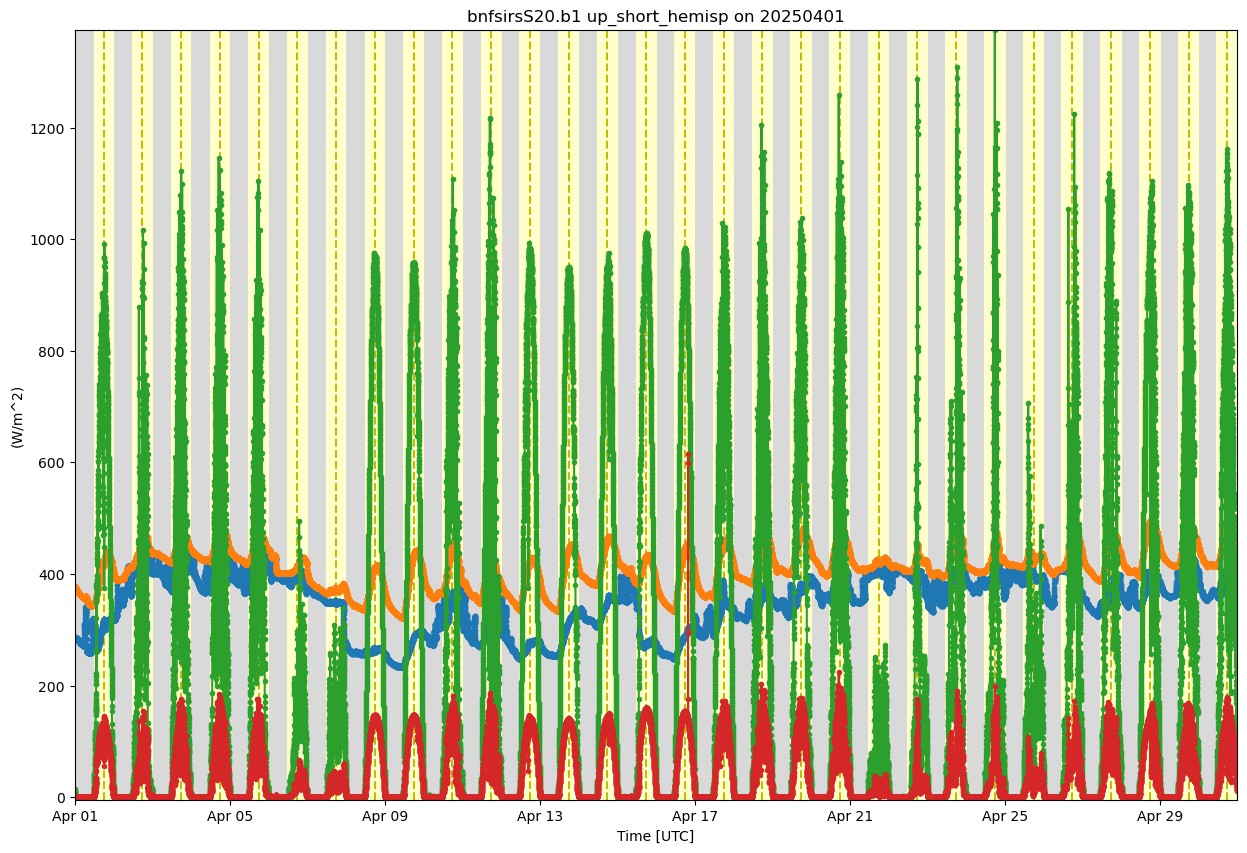

In [10]:
ds_sirs.clean.cleanup()

variable1 = 'down_long_hemisp1'
variable2 = 'up_long_hemisp'
variable3 = 'down_short_hemisp'
variable4 = 'up_short_hemisp'

display = act.plotting.TimeSeriesDisplay(ds_sirs, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(variable1, subplot_index=(0,))
display.plot(variable2, subplot_index=(0,))
display.plot(variable3, subplot_index=(0,))
display.plot(variable4, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up a day/night background
#display.day_night_background(subplot_index=(0,))
plt.show()

In [31]:
net_radiation = (ds_sirs['down_long_hemisp1'] - ds_sirs['up_long_hemisp']) + (ds_sirs['down_short_hemisp'] - ds_sirs['up_short_hemisp'])

Text(0, 0.5, 'Radiation')

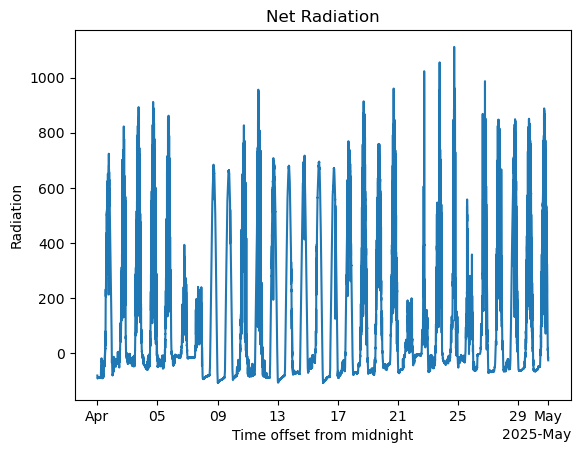

In [33]:
#net radiation calculations
net_radiation.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

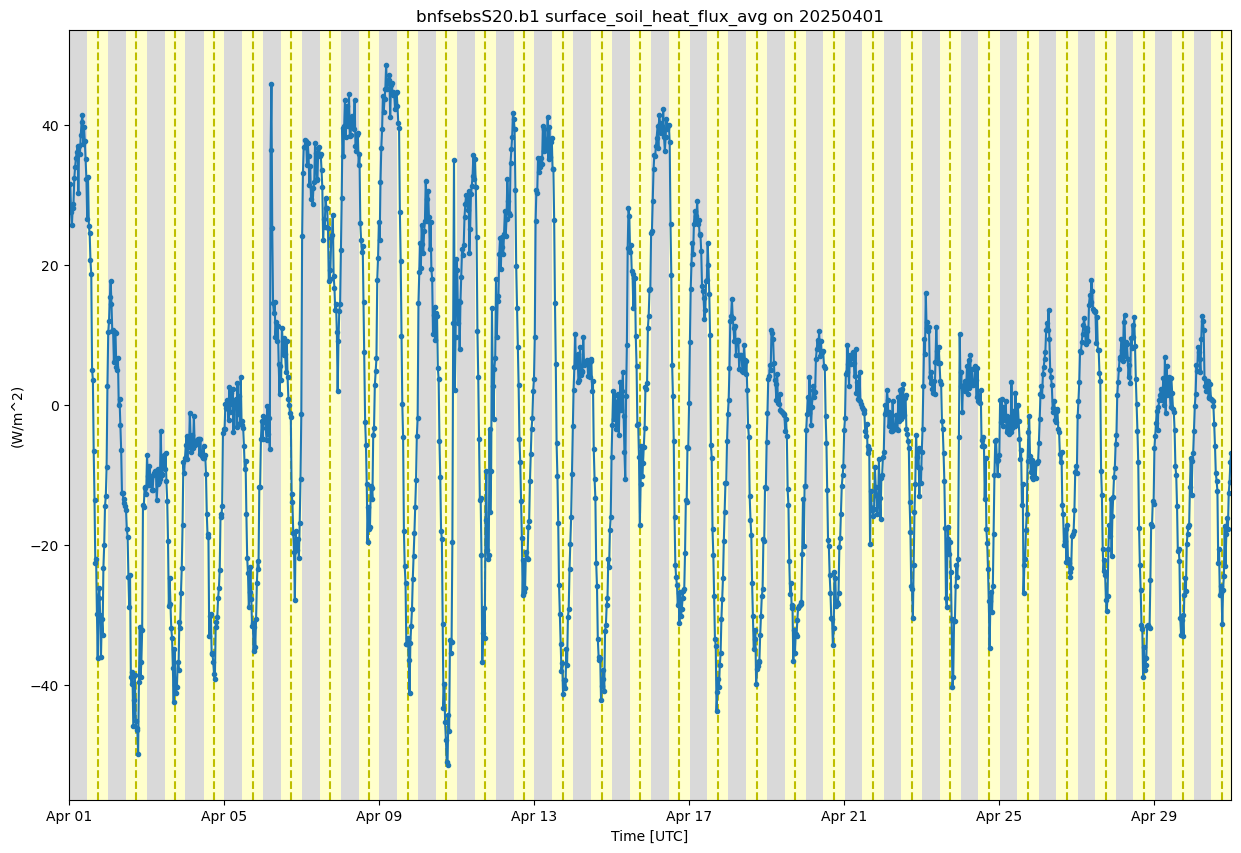

In [35]:
ds_sebs.clean.cleanup()

variable5 = 'surface_soil_heat_flux_avg'

display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(variable5, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.show()

In [37]:
AvailE = net_radiation - ds_sebs['surface_soil_heat_flux_avg']

Text(0, 0.5, 'Radiation')

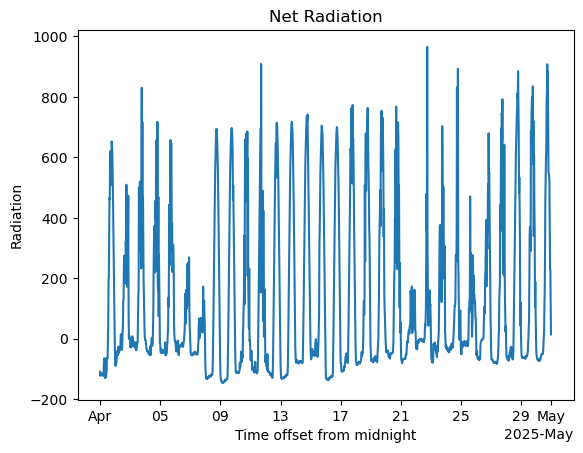

In [38]:
#net radiation calculations
AvailE.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

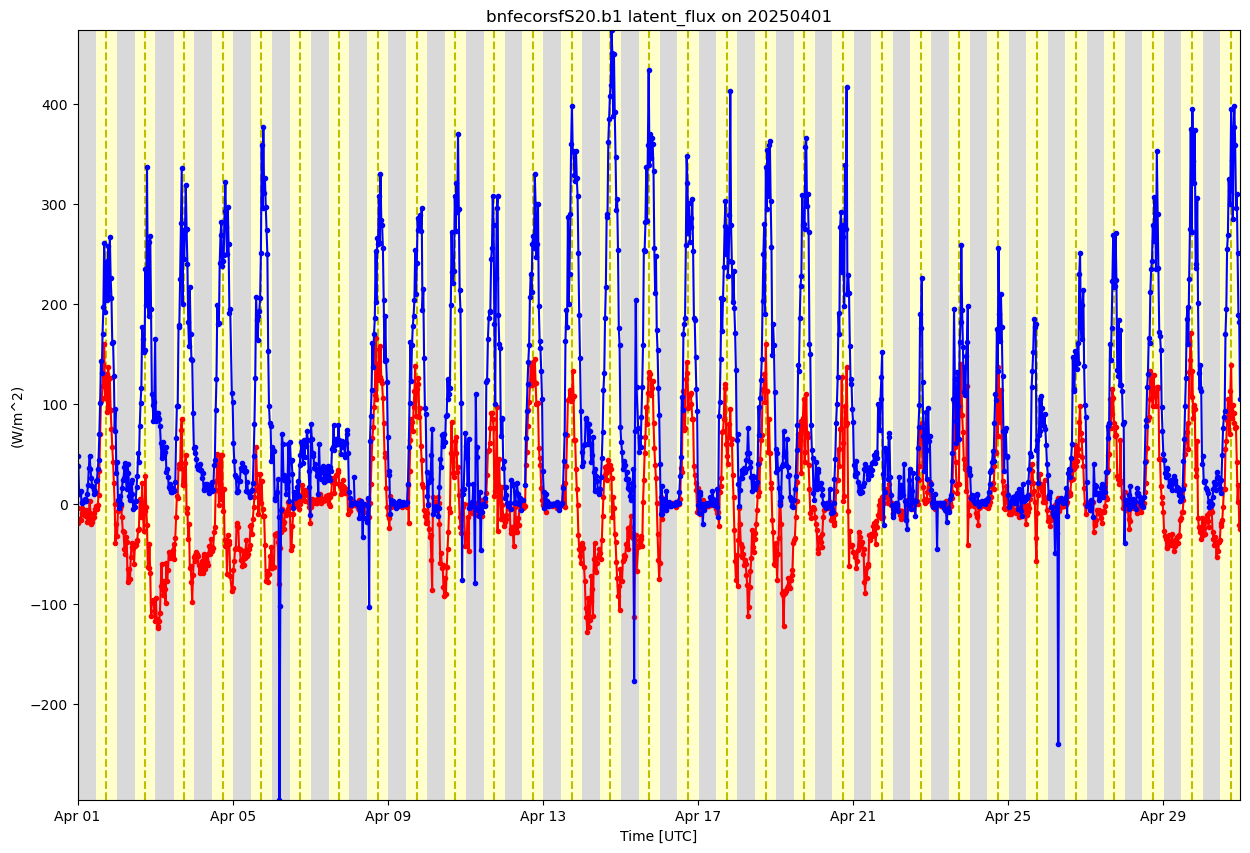

In [41]:
ds_ecor.clean.cleanup()

variable5 = 'sensible_heat_flux'
variable6 = 'latent_flux'

display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(variable5, subplot_index=(0,), color='red')
display.plot(variable6, subplot_index=(0,), color='blue')

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up a day/night background
#display.day_night_background(subplot_index=(0,))
plt.show()

In [42]:
Turb_Flux = ds_ecor['sensible_heat_flux'] + ds_ecor['latent_flux']

Text(0, 0.5, 'Radiation')

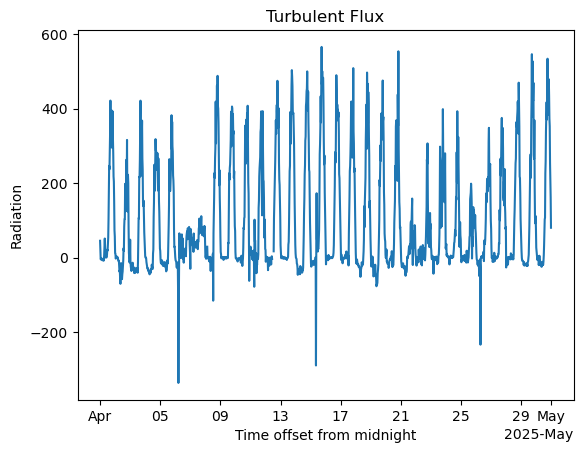

In [44]:
#net radiation calculations
Turb_Flux.plot()
plt.title('Turbulent Flux')
plt.ylabel('Radiation')

In [47]:
Turb_Flux_aligned, AvailE_aligned = xr.align(Turb_Flux, AvailE, join = 'inner')

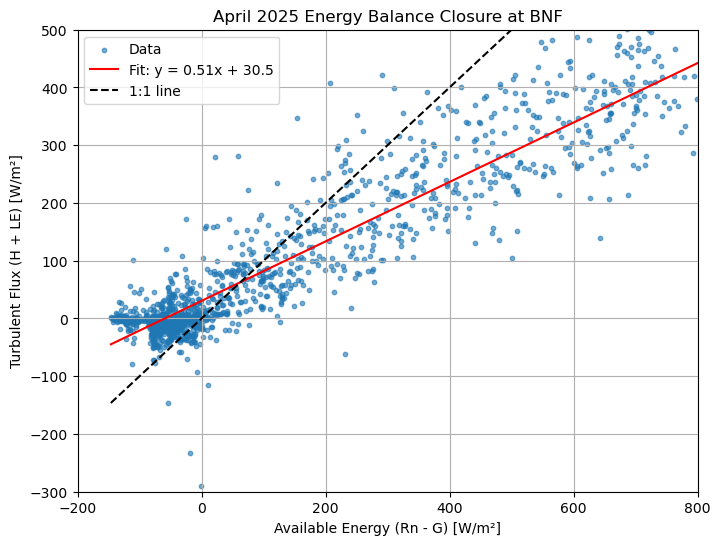

In [94]:
# Convert to numpy arrays
x = AvailE_aligned.values
y = Turb_Flux_aligned.values
# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
# Fit regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Sort x for clean line plot
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_fit = slope * x_sorted + intercept
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data', s=10)
plt.plot(x_sorted, y_fit, 'r-', label=f'Fit: y = {slope:.2f}x + {intercept:.1f}')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='1:1 line')
plt.xlabel("Available Energy (Rn - G) [W/m²]")
plt.ylabel("Turbulent Flux (H + LE) [W/m²]")
plt.xlim(-200,800)
plt.ylim(-300,500)
plt.title("April 2025 Energy Balance Closure at BNF")
plt.legend()
plt.grid(True)
plt.show()

In [91]:
datastream_sebs = 'bnfsebsS20.b1'
startdate = '2025-04-01'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_sebs = act.discovery.download_arm_data(username, token, datastream_sebs, startdate, enddate)

datastream_ecor = 'bnfecorsfS20.b1'
result_ecor = act.discovery.download_arm_data(username, token, datastream_ecor, startdate, enddate)

datastream_sirs = 'bnfsirsS20.b1'
result_sirs = act.discovery.download_arm_data(username, token, datastream_sirs, startdate, enddate)

[DOWNLOADING] bnfsebsS20.b1.20250401.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250430.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250424.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250427.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250417.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250422.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250404.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250411.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250429.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250418.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250425.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250410.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250405.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250421.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250402.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250403.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250414.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250423.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250428.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250412.000000.cdf
[DOWNLOADING] bnfsebsS20.b1.20250420.000

In [92]:
ds_sebs = act.io.read_arm_netcdf(result_sebs)
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_sirs = act.io.read_arm_netcdf(result_sirs)

In [93]:
ds_sirs.clean.cleanup()
ds_sebs.clean.cleanup()
ds_ecor.clean.cleanup()

variable1 = 'down_long_hemisp1'
variable2 = 'up_long_hemisp'
variable3 = 'down_short_hemisp'
variable4 = 'up_short_hemisp'
variable5 = 'surface_soil_heat_flux_avg'
variable6 = 'sensible_heat_flux'
variable7 = 'latent_flux'

net_radiation = (ds_sirs['down_long_hemisp1'] - ds_sirs['up_long_hemisp']) + (ds_sirs['down_short_hemisp'] - ds_sirs['up_short_hemisp'])
AvailE = net_radiation - ds_sebs['surface_soil_heat_flux_avg']
Turb_Flux = ds_ecor['sensible_heat_flux'] + ds_ecor['latent_flux']
Turb_Flux_aligned, AvailE_aligned = xr.align(Turb_Flux, AvailE, join = 'inner')

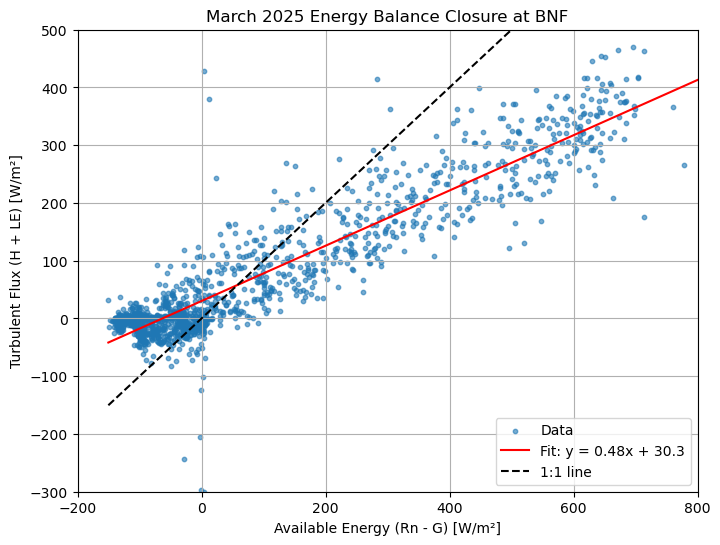

In [90]:
# Convert to numpy arrays
x = AvailE_aligned.values
y = Turb_Flux_aligned.values
# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
# Fit regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Sort x for clean line plot
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_fit = slope * x_sorted + intercept
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data', s=10)
plt.plot(x_sorted, y_fit, 'r-', label=f'Fit: y = {slope:.2f}x + {intercept:.1f}')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='1:1 line')
plt.xlabel("Available Energy (Rn - G) [W/m²]")
plt.ylabel("Turbulent Flux (H + LE) [W/m²]")
plt.xlim(-200,800)
plt.ylim(-300,500)
plt.title("March 2025 Energy Balance Closure at BNF")
plt.legend()
plt.grid(True)
plt.show()

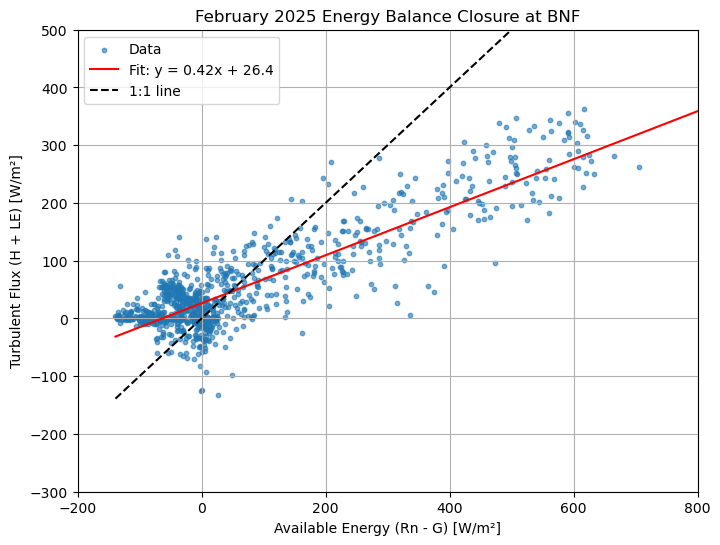

In [86]:
# Convert to numpy arrays
x = AvailE_aligned.values
y = Turb_Flux_aligned.values
# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
# Fit regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Sort x for clean line plot
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_fit = slope * x_sorted + intercept
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data', s=10)
plt.plot(x_sorted, y_fit, 'r-', label=f'Fit: y = {slope:.2f}x + {intercept:.1f}')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='1:1 line')
plt.xlabel("Available Energy (Rn - G) [W/m²]")
plt.ylabel("Turbulent Flux (H + LE) [W/m²]")
plt.xlim(-200,800)
plt.ylim(-300,500)
plt.title("February 2025 Energy Balance Closure at BNF")
plt.legend()
plt.grid(True)
plt.show()

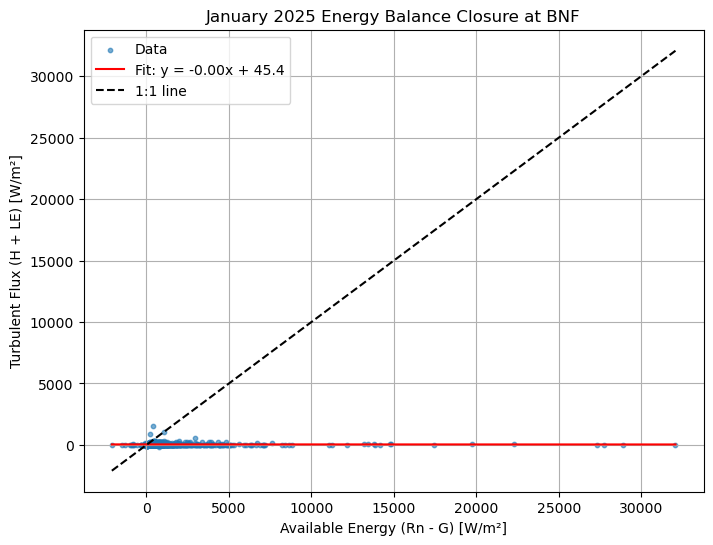

In [79]:
# Convert to numpy arrays
x = AvailE_aligned.values
y = Turb_Flux_aligned.values
# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
# Fit regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Sort x for clean line plot
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_fit = slope * x_sorted + intercept
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data', s=10)
plt.plot(x_sorted, y_fit, 'r-', label=f'Fit: y = {slope:.2f}x + {intercept:.1f}')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='1:1 line')
plt.xlabel("Available Energy (Rn - G) [W/m²]")
plt.ylabel("Turbulent Flux (H + LE) [W/m²]")
plt.title("January 2025 Energy Balance Closure at BNF")
plt.legend()
plt.grid(True)
plt.show()